In [1]:
%cd 'all_data'

/Users/simranmasand/Downloads/all_data


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import cv2
# from google.colab.patches import cv2_imshow
import re
from bs4 import BeautifulSoup #for reading xml file
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS  #for plotting wordcloud
from tqdm import tqdm
from PIL import Image    
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from datasets import load_dataset
from datasets import load_from_disk

In [10]:
checking_token = pd.read_pickle("../cs263_final/clip/roco/ViT-B_32_train_tokens.pkl")

In [20]:
(checking_token[2])

658

In [22]:
pd.read_csv("train/radiologytraindata.csv")

,id,name,caption
0,ROCO_00002,PMC4083729_AMHSR-4-14-g002.jpg,Computed tomography scan in axial view showin...
1,ROCO_00003,PMC2837471_IJD2009-150251.001.jpg,Bacterial contamination occurred after comple...
2,ROCO_00004,PMC2505281_11999_2007_30_Fig6_HTML.jpg,The patient had residual paralysis of the han...
3,ROCO_00005,PMC3745845_IJD2013-683423.005.jpg,Panoramic radiograph after immediate loading.\n
4,ROCO_00007,PMC4917066_amjcaserep-17-301-g001.jpg,Plain abdomen x-ray: Multiple air levels at t...
...,...,...,...
65445,ROCO_81819,PMC3517833_CRIM.HEMATOLOGY2012-490438.001.jpg,Initial CT abdomen with contrast showing a di...
65446,ROCO_81820,PMC5487234_rb-50-03-0190-g13.jpg,44-year-old male patient after surgical amput...
65447,ROCO_81821,PMC2974222_kjr-11-612-g001.jpg,Primary pulmonary tuberculosis in 18-year-old...
65448,ROCO_81822,PMC3532764_AJNS-7-151-g002.jpg,"MRI brain with gadolinium, coronal view, show..."


In [23]:
pd.read_csv("train/images/metadata.csv")

,Unnamed: 0,id,file_name,caption
0,0,ROCO_00002,PMC4083729_AMHSR-4-14-g002.jpg,Computed tomography scan in axial view showin...
1,1,ROCO_00003,PMC2837471_IJD2009-150251.001.jpg,Bacterial contamination occurred after comple...
2,2,ROCO_00004,PMC2505281_11999_2007_30_Fig6_HTML.jpg,The patient had residual paralysis of the han...
3,3,ROCO_00005,PMC3745845_IJD2013-683423.005.jpg,Panoramic radiograph after immediate loading.\n
4,4,ROCO_00007,PMC4917066_amjcaserep-17-301-g001.jpg,Plain abdomen x-ray: Multiple air levels at t...
...,...,...,...,...
65445,65445,ROCO_81819,PMC3517833_CRIM.HEMATOLOGY2012-490438.001.jpg,Initial CT abdomen with contrast showing a di...
65446,65446,ROCO_81820,PMC5487234_rb-50-03-0190-g13.jpg,44-year-old male patient after surgical amput...
65447,65447,ROCO_81821,PMC2974222_kjr-11-612-g001.jpg,Primary pulmonary tuberculosis in 18-year-old...
65448,65448,ROCO_81822,PMC3532764_AJNS-7-151-g002.jpg,"MRI brain with gadolinium, coronal view, show..."


In [3]:
!ls

datasets       test.pkl       train          validation
test           total_data.pkl train.pkl


In [53]:
os.getcwd()

'/Users/simranmasand/Downloads/all_data'

In [7]:
temp = pd.read_csv('train/radiologytraindata.csv')
temp.head()

,id,name,caption
0,ROCO_00002,PMC4083729_AMHSR-4-14-g002.jpg,Computed tomography scan in axial view showin...
1,ROCO_00003,PMC2837471_IJD2009-150251.001.jpg,Bacterial contamination occurred after comple...
2,ROCO_00004,PMC2505281_11999_2007_30_Fig6_HTML.jpg,The patient had residual paralysis of the han...
3,ROCO_00005,PMC3745845_IJD2013-683423.005.jpg,Panoramic radiograph after immediate loading.\n
4,ROCO_00007,PMC4917066_amjcaserep-17-301-g001.jpg,Plain abdomen x-ray: Multiple air levels at t...


In [8]:
temp.rename(columns={"name":"file_name"},inplace=True)

In [9]:
temp

,id,file_name,caption
0,ROCO_00002,PMC4083729_AMHSR-4-14-g002.jpg,Computed tomography scan in axial view showin...
1,ROCO_00003,PMC2837471_IJD2009-150251.001.jpg,Bacterial contamination occurred after comple...
2,ROCO_00004,PMC2505281_11999_2007_30_Fig6_HTML.jpg,The patient had residual paralysis of the han...
3,ROCO_00005,PMC3745845_IJD2013-683423.005.jpg,Panoramic radiograph after immediate loading.\n
4,ROCO_00007,PMC4917066_amjcaserep-17-301-g001.jpg,Plain abdomen x-ray: Multiple air levels at t...
...,...,...,...
65445,ROCO_81819,PMC3517833_CRIM.HEMATOLOGY2012-490438.001.jpg,Initial CT abdomen with contrast showing a di...
65446,ROCO_81820,PMC5487234_rb-50-03-0190-g13.jpg,44-year-old male patient after surgical amput...
65447,ROCO_81821,PMC2974222_kjr-11-612-g001.jpg,Primary pulmonary tuberculosis in 18-year-old...
65448,ROCO_81822,PMC3532764_AJNS-7-151-g002.jpg,"MRI brain with gadolinium, coronal view, show..."


In [4]:
#create a function that circulates through train,test,validation and creates a metadata file
def meta_generator(folders,root = os.getcwd()):
    for fol in folders:
        if fol != "validation":
            path = root+'/'+fol
            temp = pd.read_csv(fol+'/radiology'+fol+'data.csv')
            temp.rename(columns={"name":"file_name"},inplace=True)
            temp.to_csv(root+'/'+fol+'/images/metadata.csv')
        else:
            temp = pd.read_csv(fol+'/radiologyvaldata.csv')
            temp.rename(columns={"name":"file_name"},inplace=True)
            temp.to_csv(root+'/'+fol+'/images/metadata.csv')

        

In [5]:
meta_generator(["train","validation","test"])

In [57]:
%ls

datasets/       test.pkl        train/          validation/
test/           total_data.pkl  train.pkl


To run PyTorch code on the GPU, use torch.device("mps") analogous to torch.device("cuda") on an Nvidia GPU. Hence, in this example, we move all computations to the GPU:

In [6]:
dataset_train = load_dataset("imagefolder", data_dir="train/images", split="train")

Resolving data files:   0%|          | 0/65420 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /Users/simranmasand/.cache/huggingface/datasets/imagefolder/default-f882413a44af1acb/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.


In [11]:
dataset_val = load_dataset("imagefolder", data_dir="validation/images")

Resolving data files:   0%|          | 0/8176 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /Users/simranmasand/.cache/huggingface/datasets/imagefolder/default-6dacec2d6b7601b8/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
dataset_test = load_dataset("imagefolder", data_dir="test/images")

Resolving data files:   0%|          | 0/8177 [00:00<?, ?it/s]

Found cached dataset imagefolder (/Users/simranmasand/.cache/huggingface/datasets/imagefolder/default-ddc5999ccf78ceb8/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)


  0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
dataset_train.save_to_disk('datasets/train')

Saving the dataset (0/8 shards):   0%|          | 0/65419 [00:00<?, ? examples/s]

In [14]:
dataset_val.save_to_disk('datasets/val')

Saving the dataset (0/2 shards):   0%|          | 0/8175 [00:00<?, ? examples/s]

In [15]:
dataset_test.save_to_disk('datasets/test')

Saving the dataset (0/2 shards):   0%|          | 0/8176 [00:00<?, ? examples/s]

In [5]:
train_data = load_from_disk('datasets/train')

In [6]:
train_data

Dataset({
    features: ['image', 'Unnamed: 0', 'id', 'caption'],
    num_rows: 65419
})

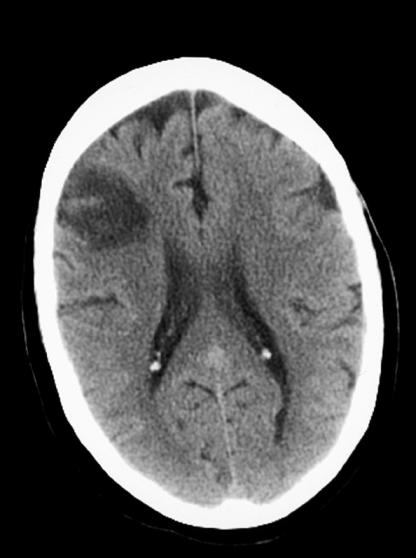

In [16]:
display(dataset_train[20]["image"])

In [17]:
dataset_train[20]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=416x558>,
 'Unnamed: 0': 26111,
 'id': 'ROCO_32588',
 'caption': ' CT Brain Scan on Admission Showing an Infarct in the Posterior Right Frontal Lobe\n'}

In [ ]:
train_data = load_from_disk('datasets/train')


from torch.utils.data import Dataset

class ImageCaptioningDataset(Dataset):
    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]

        encoding = self.processor(images=item["image"], text=item["caption"], padding="max_length", return_tensors="pt")

        # remove batch dimension
        encoding = {k:v.squeeze() for k,v in encoding.items()}

        return encoding

In [ ]:
from transformers import AutoProcessor, BlipForConditionalGeneration

processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

In [ ]:
train_dataset = ImageCaptioningDataset(train_data, processor)